In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [13]:
# loading the csv data to a pandas dataframe
gold_data = pd.read_csv("gold_price_data.csv")

In [14]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [15]:
gold_data.shape

(2290, 6)

In [24]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [29]:
correlation = gold_data.corr()

<AxesSubplot:>

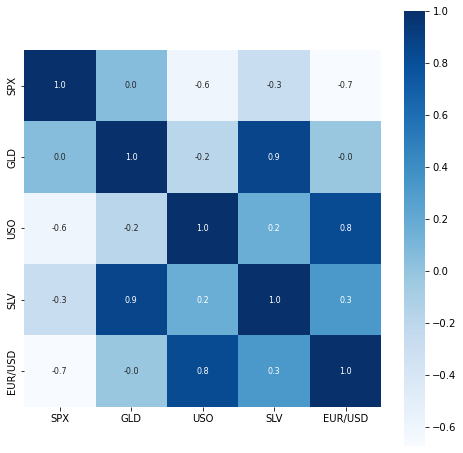

In [31]:
#constructing the Heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')

In [32]:
# correlation values of GLD
print(correlation['GLD']) 

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


#checking the distribution of gold price
sns.distplot(gold_data['GLD'], color = 'green')

In [37]:
# train test split
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state = 2 )

# Model Training

# Using Random Forest Algorithm

In [43]:
regressor = RandomForestRegressor(n_estimators=100)

In [44]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# Model Evaluation

In [45]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [46]:
test_data_prediction

array([168.52779895,  81.69829983, 115.84120038, 127.72990102,
       120.68700118, 154.65559813, 150.19509871, 126.14020037,
       117.30229865, 125.97850035, 116.77790113, 171.98010084,
       141.70899848, 167.96659847, 115.26280017, 117.83360027,
       139.71960326, 170.08930046, 159.64220386, 157.6097998 ,
       155.21619984, 125.23750014, 175.63059975, 156.97960389,
       125.26610079,  93.66590003,  78.36629978, 120.43159994,
       119.16459967, 167.40739991,  88.24330038, 125.38910026,
        91.11290096, 117.76470006, 121.19059927, 136.70100138,
       115.81610113, 114.78350068, 147.02800005, 107.2429013 ,
       104.45830198,  87.16699792, 126.57080056, 118.06859948,
       152.83459887, 119.63169968, 108.38230017, 108.14109834,
        93.19040072, 127.09379778,  75.16760038, 113.59029897,
       121.43659995, 111.2030992 , 118.90199909, 121.20349911,
       160.09599984, 168.03880097, 146.98909665,  85.84699845,
        94.19940046,  86.84939891,  90.36759977, 118.91

# R squared Error for comparision

In [47]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R squared error :', error_score)

R squared error : 0.9890374673512494


# Comparing the actual values and predicted values in a plot

In [48]:
Y_test = list(Y_test)

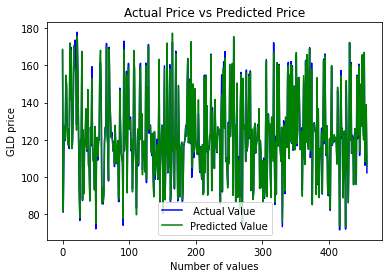

In [53]:
plt.plot(Y_test, color = 'blue',label=' Actual Value')
plt.plot(test_data_prediction, color='green',label = 'Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()